In [1]:
import stylo
stylo.__version__

'0.4.2'

# How to Draw using Mathemetics

PyConUK 2018

[@alcarneyme](https://twitter.com/alcarneyme)

In [2]:
from math import pi
import numpy as np

from stylo.domain import SquareDomain
from stylo.domain.helpers import PolarConversion
from stylo.domain.transform import RealDomainTransform
from stylo.shape import Shape, Circle
from stylo.color import FillColor, RGB8
from stylo.image import SimpleImage

# Used to control the resolution of the generated images
px = 1024

# Used to control the size of matplotlib figures
N = 10
fig_size = (N, N)
 
# The domain - the underlying grid of numbers used when evaluating rules
domain = SquareDomain(-1, 1)

# A rule that defines a circle with center at (x, y) with radius r
circle = Circle(0, 0, 0.75)

# Define some colors to use
white = FillColor(RGB8.parse('ffffff'))
black = FillColor()   # FillColor uses black by default
yellow = FillColor(RGB8.parse('ffff00'))

%matplotlib inline

Here we create a number of custom shapes that are used throughout the presentation

In [3]:
class Checker(Shape):
    
    def draw(self):
        
        def checker(x, y):
            return x * y > 0
        return checker
        
checker = Checker()

In [4]:
class PartGear(Shape):
    
    def draw(self):
        
        def gear(x, y, t):
            
            rs = 0.4*np.sin(8*t)
            ds = np.sqrt(x*x + y*y)
            
            return ds < 0.5 + (rs*rs)
        
        return gear
        
part_gear = PartGear()

In [5]:
class Gear(Shape):
    
    def draw(self):
        
        def gear(x, y, t):
            
            rs = 0.4*np.sin(8*t)
            ds = np.sqrt(x*x + y*y)
            
            return np.logical_and(0.2 < ds, ds < 0.5 + (rs*rs))
        
        return gear
    
gear = Gear()

In [6]:
class Pacman(Shape):
    
    def draw(self):
        
        def pacman(x, y, t):
            cs = circle(x=x, y=y)
            ts = np.logical_not(np.abs(t) < pi/6)
            
            return np.logical_and(cs, ts)
        
        return pacman
        
pacman = Pacman()

Here we define a domain transform to be used later on in the talk

In [7]:
class HourglassDomain(PolarConversion, RealDomainTransform):
    
    def _repr(self):
        return "HourglassDomain"
    
    def _get_x(self):
        
        xs = self.domain.x
        ys = self.domain.y
        
        def mk_xs(width, height):
            return xs(width, height) / ys(width, height)
        
        return mk_xs
    
    def _get_y(self):
        return self.domain.y

hourglass_domain = HourglassDomain(domain)

A blank canvas used during the talk

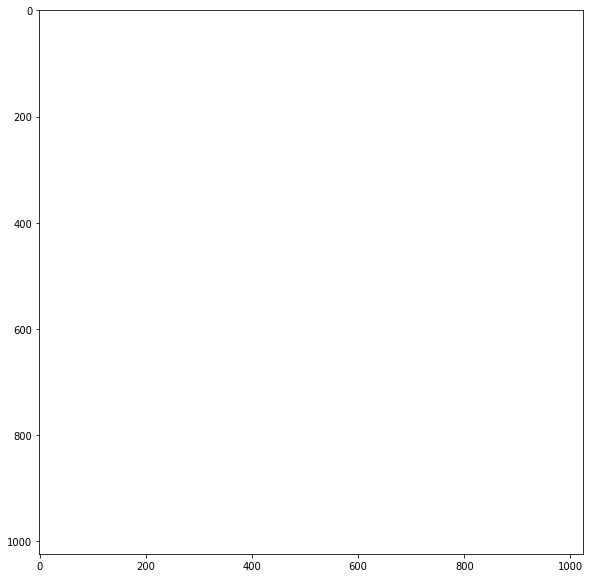

In [8]:
image = SimpleImage(domain, circle, white)
image(px, px, size=fig_size);

Here we draw the checker board pattern we defined earlier

\\[
 x \times y > 0
\\]

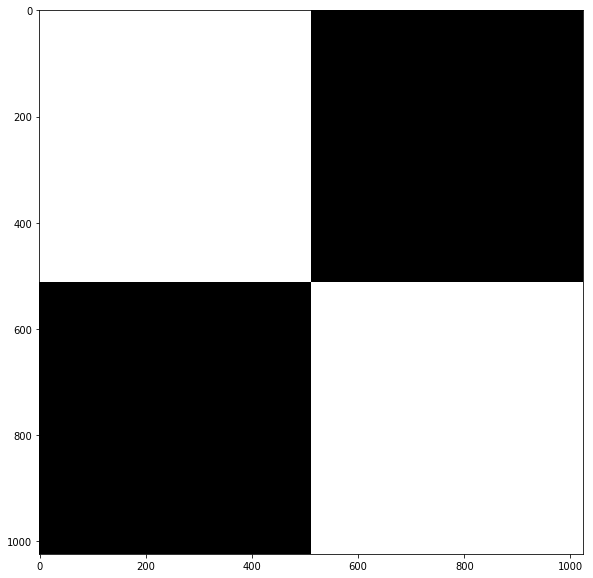

In [9]:
image = SimpleImage(domain, checker, black)
image(px, px, size=fig_size);

\\[
    \sqrt{x^2 + y^2} \leq r^2
\\]

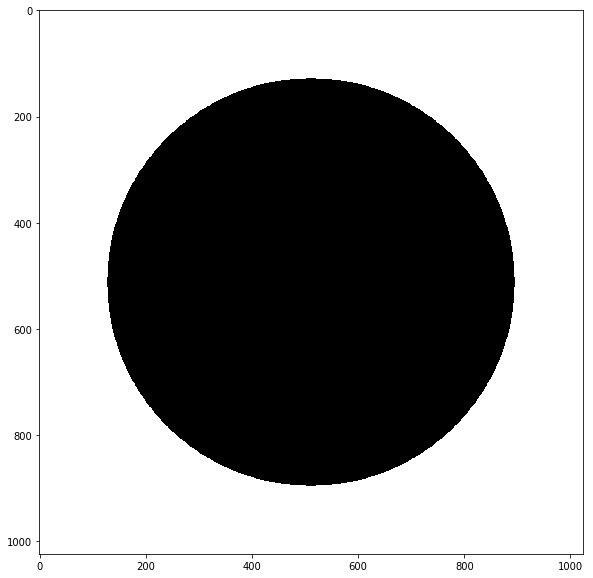

In [10]:
image = SimpleImage(domain, circle, black)
image(px, px, size=fig_size); 

\\[
    \sqrt{x^2 + y^2} \leq (r(\theta))^2
\\]

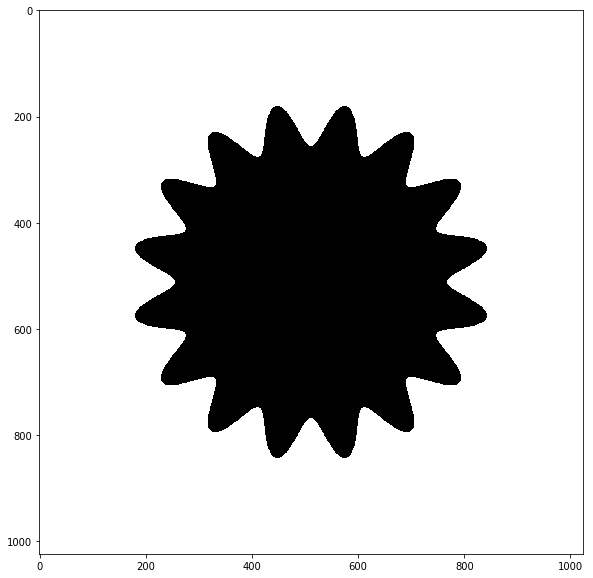

In [11]:
image = SimpleImage(domain, part_gear, black)
image(px, px, size=fig_size);

\\[
    c \leq \sqrt{x^2 + y^2} \leq r(\theta)^2
\\]

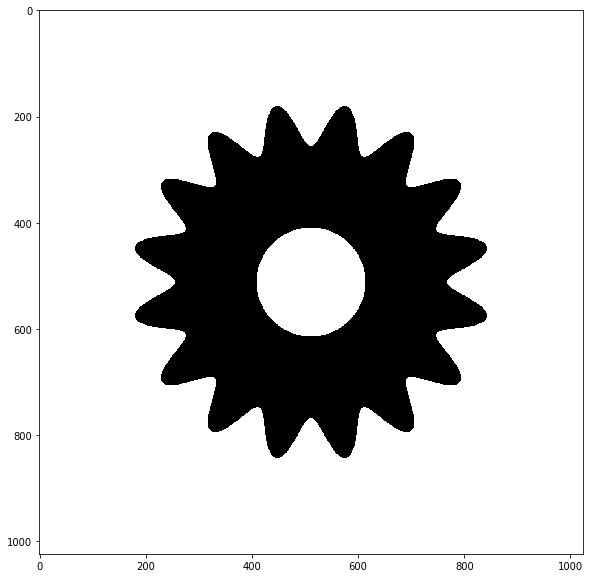

In [12]:
image = SimpleImage(domain, gear, black)
image(px, px, size=fig_size);

\\[
    \sqrt{x^2 + y^2} \leq r^2 \text{ AND } \left(\theta \leq -\frac{\pi}{6} \text{ OR }
    \frac{\pi}{6} \leq \theta \right)
\\]

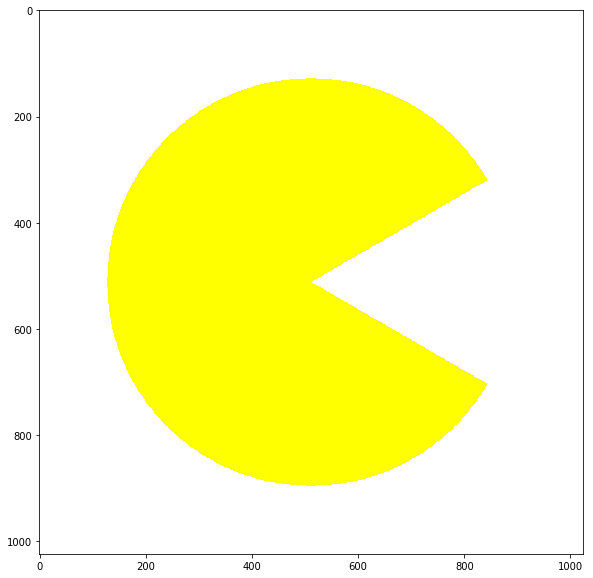

In [18]:
image = SimpleImage(domain, pacman, yellow)
image(px, px, size=fig_size);

\\[
    \sqrt{\left(\frac{x}{y}\right)^2 + y^2} \leq r^2
\\]

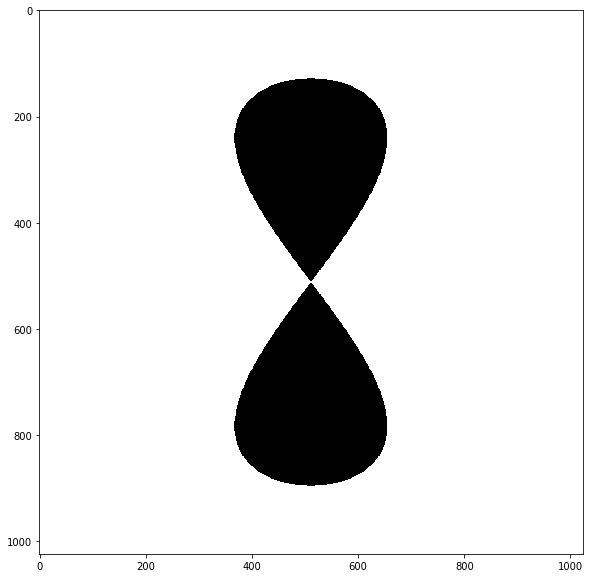

In [14]:
image = SimpleImage(hourglass_domain, circle, black)
image(px, px, size=fig_size);

# pip install stylo

- [Github](https://github.com/alcarney/stylo)
- [Docs](https://alcarney.github.io/stylo)